## Papers EDA
Exploratory data analysis focused on papers.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

%matplotlib inline

In [3]:
%%time

# load metadata extracted data in notebook 00_load_metadata
arxiv_metadata = pd.read_csv('data/arxiv_metadata.zip')

<timed exec>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 11.9 s, sys: 1.43 s, total: 13.3 s
Wall time: 13.3 s


### Submitted vs. published papers

In [4]:
idx = arxiv_metadata['journal-ref'].isna()
arxiv_published = arxiv_metadata[~idx]
pd.DataFrame.from_dict({'All papers': arxiv_metadata.shape[0], 'Published papers': arxiv_published.shape[0]}, orient='index', columns=["Count"])

,Count
All papers,2412624
Published papers,831878


### Papers by subject

In [5]:
keys = ["Computer Science", "Economics", "Electrical Engineering and Systems Science", "Mathematics", "Physics", "Quantitative Biology", "Quantitative Finance", "Statistics", "Junk"]

In [6]:
# total papers submitted, by subject
counts_total = {key:arxiv_metadata[key].sum() for key in keys if key in arxiv_metadata.keys()}
counts_total_df = pd.DataFrame.from_dict(counts_total, orient='index', columns=["Count"])
counts_total_df['Subject'] = counts_total_df.index

# papers published, by subject
counts_published = {key:arxiv_published[key].sum() for key in keys if key in arxiv_published.keys()}
counts_published_df = pd.DataFrame.from_dict(counts_published, orient='index', columns=["Count"])
counts_published_df['Subject'] = counts_published_df.index

# merge both into 1 dataframe
counts_df = counts_total_df.join(counts_published_df, on="Subject", how='left', lsuffix='_left', rsuffix='_right')
counts_df = counts_df.drop(['Subject', 'Subject_left', 'Subject_right'], axis=1)
counts_df.rename(columns={'Count_left':'Submitted', 'Count_right':'Published'}, inplace=True)
counts_df.sort_values('Published', ascending=False, inplace=True)
counts_df

,Submitted,Published
Physics,1222329,617797
Computer Science,815903,167662
Mathematics,623796,144144
Statistics,115092,17182
Quantitative Biology,44284,13023
Electrical Engineering and Systems Science,78751,8768
Quantitative Finance,18398,3755
Economics,9100,1033
Junk,3850,660


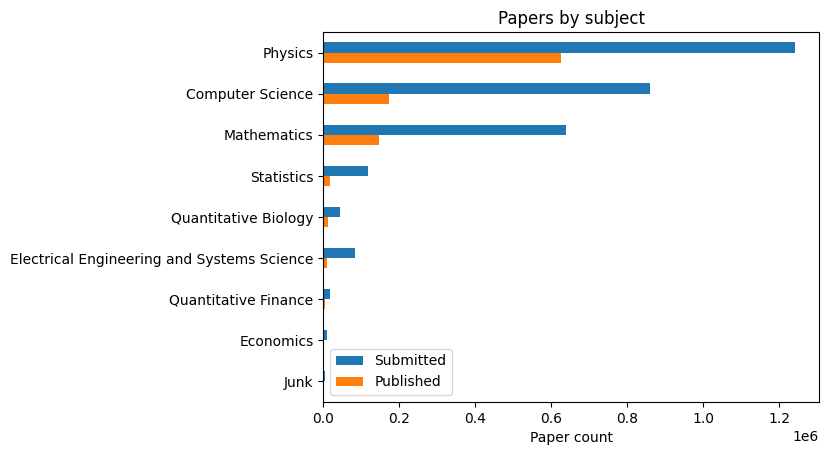

In [59]:
pp_subject = counts_df.sort_values('Published', ascending=False)
bar_plot = pp_subject.plot.barh()
bar_plot.set_title('Papers by subject')
bar_plot.set_xlabel('Paper count')
bar_plot.invert_yaxis()
plt.show();

_Note that cummulated column totals my be different than total number of papers, as a paper may be in several categories._

### Published papers over time

#### Cumulative number of papers 

In [7]:
# keep only papers 1992 - 2023, as older years are incomplete
min_year = 1992  # arxiv_metadata.year.min()
max_year = 2023  # arxiv_metadata.year.max()

In [8]:
# PUBLISHED
arxiv_published = arxiv_published[(arxiv_published['year'] >= min_year)]
arxiv_published = arxiv_published[(arxiv_published['year'] <= max_year)]
counts_published = arxiv_published.groupby([arxiv_published.year, arxiv_published.month]).size()
counts_published.index.set_names(['year', 'month'], inplace=True)

# SUBMITTED (ALL PAPERS)
arxiv_metadata = arxiv_metadata[(arxiv_metadata['year'] >= min_year)]
arxiv_metadata = arxiv_metadata[(arxiv_metadata['year'] <= max_year)]
counts_submitted = arxiv_metadata.groupby([arxiv_metadata.year, arxiv_metadata.month]).size()
counts_submitted.index.set_names(['year', 'month'], inplace=True)

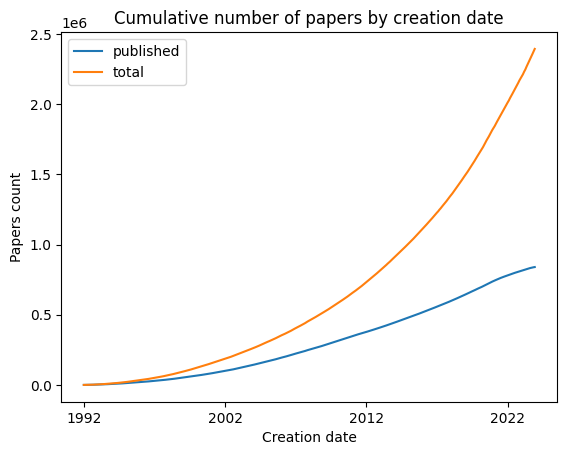

In [69]:
plt.title('Cumulative number of papers by creation date')
plt.xticks(ticks=range(0, len(counts_published), 120), labels=range(min_year, max_year+1, 10))
plt.xlabel('Creation date')
plt.ylabel('Papers count')
plt.plot(np.cumsum(list(counts_published)), label='published')
plt.plot(np.cumsum(list(counts_submitted)), label='total')
plt.legend()
plt.show();

#### Monthly number of published papers

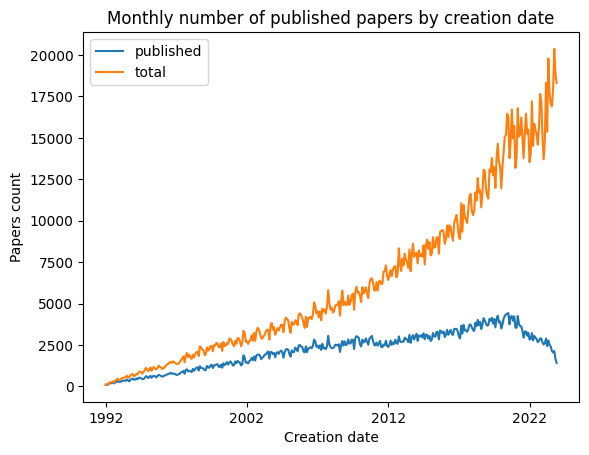

In [71]:
plt.title('Monthly number of papers by creation date')
plt.xticks(ticks=range(0, len(counts_published), 120), labels=range(min_year, max_year+1, 10))
plt.xlabel('Creation date')
plt.ylabel('Papers count')
plt.plot(list(counts_published), label='published')
plt.plot(list(counts_submitted), label='total')
plt.legend()
plt.show();

### Cumulative number of papers by creation date and subject

In [51]:
# List of subjects, in order of published papers count
subjects = counts_df.sort_values('Published', ascending=False).index

In [76]:
def count_by_subject(df, subject):
    """Returns a pandas Series of year/month/papercount"""
    idx = df[key] == 1
    counts = df[idx].groupby([df.year, df.month]).size()
    return counts

# PUBLISHED
by_subject_published = {}
for key in keys:  # keys is an array with subjects, defined above
    by_subject_published[key] = count_by_subject(arxiv_published, key)

# SUBMITTED (ALL PAPERS)
by_subject_all = {}
for key in keys:  # keys is an array with subjects, defined above
    by_subject_all[key] = count_by_subject(arxiv_metadata, key)


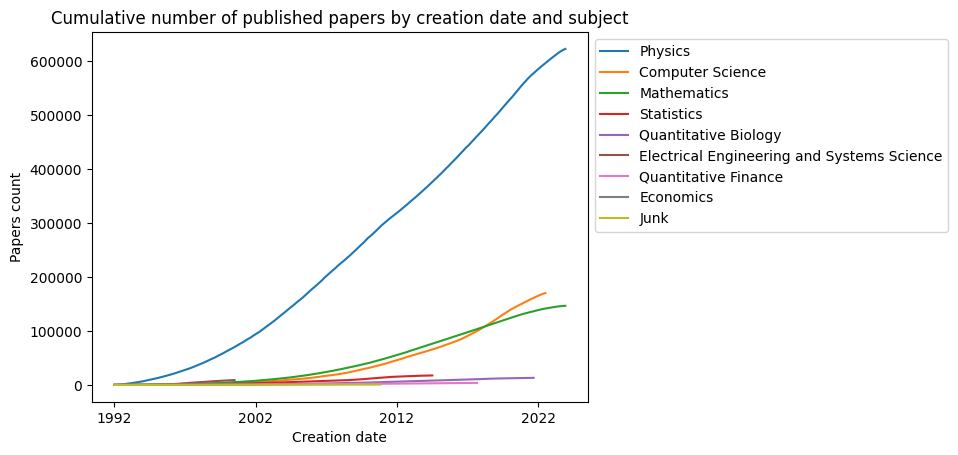

In [79]:
plt.title('Cumulative number of published papers by creation date and subject')
plt.xticks(ticks=range(0,367,120), labels=range(min_year, max_year+1, 10))
plt.xlabel('Creation date')
plt.ylabel('Papers count')
for subject in subjects:
    plt.plot(np.cumsum(list(by_subject_published[subject])), label=subject)
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

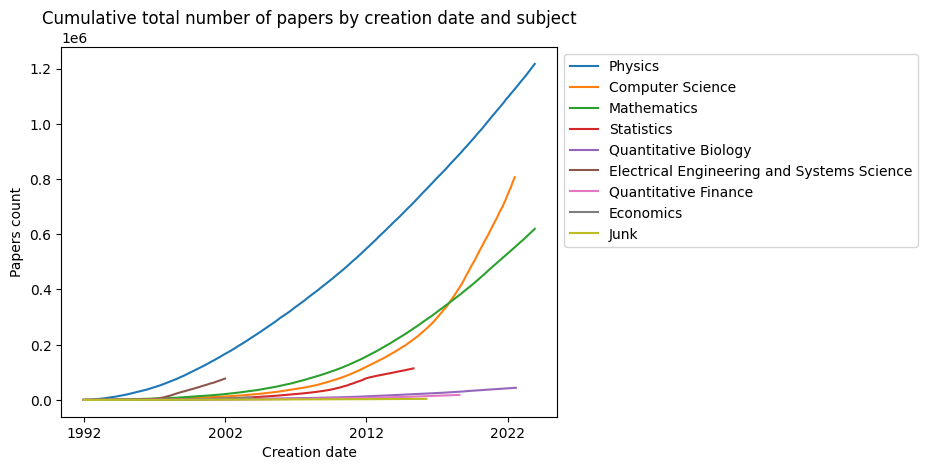

In [77]:
plt.title('Cumulative total number of papers by creation date and subject')
plt.xticks(ticks=range(0,367,120), labels=range(min_year, max_year+1, 10))
plt.xlabel('Creation date')
plt.ylabel('Papers count')
for subject in subjects:
    plt.plot(np.cumsum(list(by_subject_all[subject])), label=subject)
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

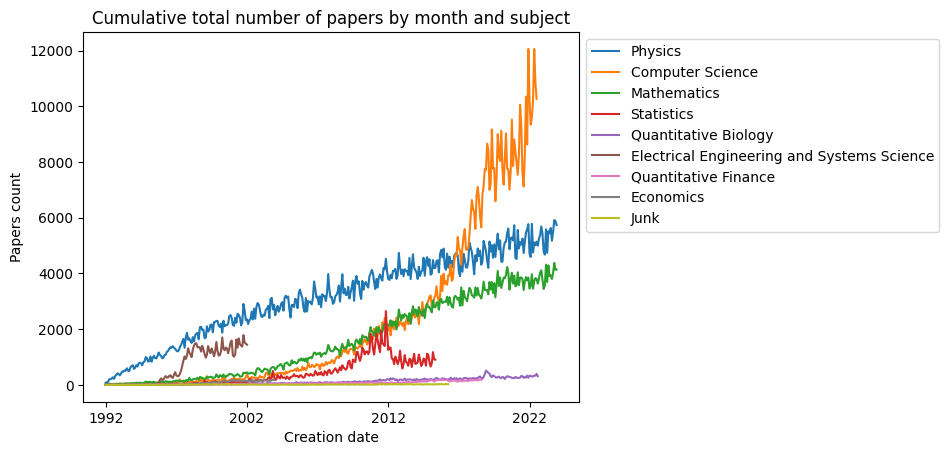

In [80]:
plt.title('Cumulative total number of papers by month and subject')
plt.xticks(ticks=range(0,367,120), labels=range(min_year, max_year+1, 10))
plt.xlabel('Creation date')
plt.ylabel('Papers count')
for subject in subjects:
    plt.plot(list(by_subject_all[subject]), label=subject)
plt.legend(bbox_to_anchor=(1, 1))
plt.show();